# Data Prep: Simple Linear Regression

In this notebook we will use data on house sales in King County, Washington state to predict house prices using simple (one input) linear regression using Scikit-Learn. Scikit-Learn is a simple, efficient and well-designed tool for data analysis and machine learning. You will use it and seaborn to:

* Use Python to load, visualize and prepare the data
* Use SciKit-Learn functions to compute important summary statistics
* Use matplotlib and Seaborn to plot and visualize the data
* Try fitting a Simple Linear Regression model
* Make a prediction with the model

At the end of this process you should have a good feel for the King County dataset.  In this notebook you will be provided with complete code.  The goal here is to use easily available tools to get a better understanding of the dataset.  Once that is accomplished we will use classification to sort homes into two catagories (in the next Jupyter notebook).  Clearly this a simplified problem, but easy to understand for new data scientists.

First, we need to load all of the appropriate libraries.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
housing = pd.read_csv("kc_house_data2.csv")

## Our First Look at the Data

At this point we would like to see some summary data on the data set. Can we make any early conclusions?

In [3]:
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21609 non-null float64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21612 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [6]:
housing.isnull().sum()

id               0
date             0
price            0
bedrooms         4
bathrooms        0
sqft_living      0
sqft_lot         0
floors           1
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Can we figure out which feature correlates best with price?

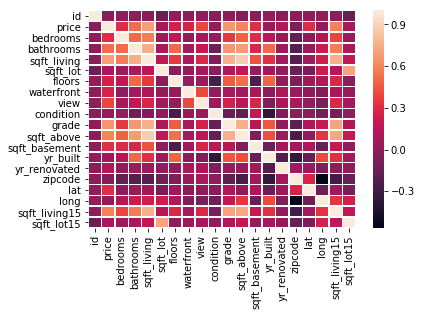

In [7]:
sns.heatmap(housing.corr(), linewidths=.5)

ok, it looks like the best correlation is between sqft_living and price, but does this correlation have a pattern?

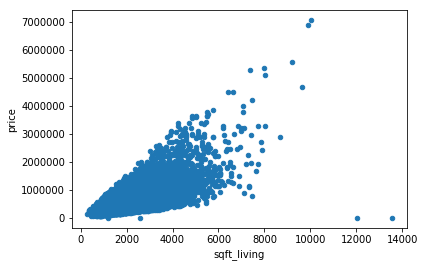

In [8]:
housing.plot(kind="scatter", x="sqft_living", y="price")

This does look like a simple linear relationship, but with a healthy dose of noise mixed in.  Furthermore, it looks like the noise increases with square feet.  Seaborn has a nifty feature that adds in linear regression line for you.  This is very handy for early looks:

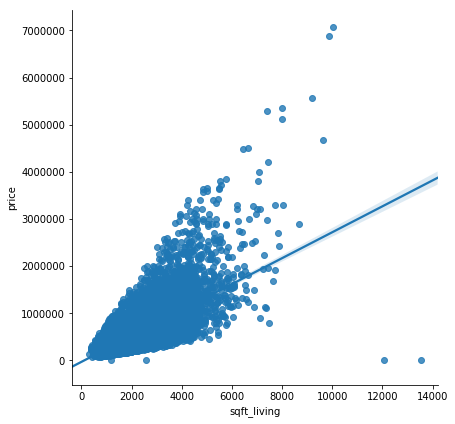

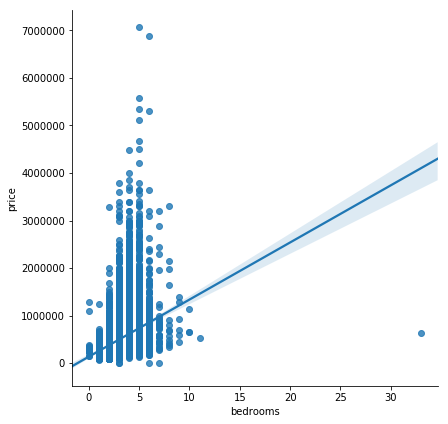

In [9]:
sns.pairplot(housing, x_vars=['sqft_living'], y_vars=['price'], height=6, kind='reg')
sns.pairplot(housing, x_vars=['bedrooms'], y_vars=['price'], height=6, kind='reg')

In [10]:
feature_cols = ['sqft_living']
X = housing[feature_cols]
y = housing['price']

In [11]:
LR = LinearRegression()
LR.fit(X, y)
predict_LR = LR.predict(X)

In [14]:
Xnew = [[12000]]
ynew = LR.predict(Xnew)
ynew

array([3267377.9474019])

The correct answer is 3,323,902 or ~60K higher.  What went wrong?  60k sounds modest, but if the owners had a 3M mortgage then they are losing 22% of what their proceeds.